In [ ]:
# install dependencies 
!pip install kaggle
!pip install spacy
!pip install nltk
import nltk
nltk.download('tokenize')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 


[nltk_data] Error loading tokenize: Package 'tokenize' not found in
[nltk_data]     index
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
#création d'un dossier kaggle
! mkdir ~/.kaggle

In [ ]:
! cp '/content/drive/MyDrive/Recipe/kaggle.json' ~/.kaggle

cp: cannot stat '/content/drive/MyDrive/Recipe/kaggle.json': No such file or directory


In [ ]:
#donner les droits d'accès à kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! kaggle datasets download -d kaggle/recipe-ingredients-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! unzip /content/recipe-ingredients-dataset.zip -d recipe_data

unzip:  cannot find or open /content/recipe-ingredients-dataset.zip, /content/recipe-ingredients-dataset.zip.zip or /content/recipe-ingredients-dataset.zip.ZIP.


In [ ]:
#Load training data
df_train = pd.read_json('/content/drive/MyDrive/Recipe/train.json')
df_train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#General data info


# General dataset info

Simple information about the dataset, like its size.

The number of entries

In [ ]:
num_entries = len(df_train)
num_entries

39774

The cuisine types

In [ ]:
all_cuisines = set(df_train['cuisine'])
all_cuisines

{'brazilian',
 'british',
 'cajun_creole',
 'chinese',
 'filipino',
 'french',
 'greek',
 'indian',
 'irish',
 'italian',
 'jamaican',
 'japanese',
 'korean',
 'mexican',
 'moroccan',
 'russian',
 'southern_us',
 'spanish',
 'thai',
 'vietnamese'}

All ingredients

In [ ]:
all_ingredients = set()
for ingredients in df_train['ingredients']:
    all_ingredients = all_ingredients | set(ingredients)
len(all_ingredients)

6714

ingredients per origin

In [ ]:
ingredients_origins={}
for i in all_cuisines:
  ingredients_origins[i] =[ ]

for i in range(1,len(df_train)):
  ingredients_origins[df_train.iloc[i,1]].extend(df_train.iloc[i,2]) 


for i in range(1,len(df_train)):
  ingredients_origins[df_train.iloc[i,1]]=list(set(df_train.iloc[i,2]))


ingredients_origins

{'brazilian': ['sweetened condensed milk', 'lime', 'water', 'sugar'],
 'british': ['all-purpose flour',
  'heavy cream',
  'baking powder',
  'extra sharp cheddar cheese',
  'salt',
  'chopped fresh chives',
  'sugar'],
 'cajun_creole': ['smoked sausage',
  'creole seasoning',
  'seasoned bread crumbs',
  'okra',
  'olive oil'],
 'chinese': ['boneless chicken skinless thigh',
  'corn starch',
  'Shaoxing wine',
  'dark soy sauce',
  'broccoli',
  'vodka',
  'peanuts',
  'oil',
  'toasted sesame seeds',
  'minced garlic',
  'flour',
  'baking soda',
  'egg whites',
  'store bought low sodium chicken stock',
  'Chinese rice vinegar',
  'steamed white rice',
  'scallions',
  'baking powder',
  'kosher salt',
  'fresh ginger',
  'sugar'],
 'filipino': ['mayonaise', 'pepper', 'salmon fillets', 'base', 'salt'],
 'french': ['thyme sprigs', 'bay leaf', 'cabernet sauvignon', 'shallots'],
 'greek': ['ground cinnamon',
  'milk',
  'kosher salt',
  'pomegranate',
  'ground black pepper',
  'ground

Average number of ingredients per recipe

In [ ]:
total_ingredients = 0
for ingredients in df_train['ingredients']:
    total_ingredients += len(ingredients)
average_ingredients = total_ingredients / num_entries
average_ingredients



10.76771257605471

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

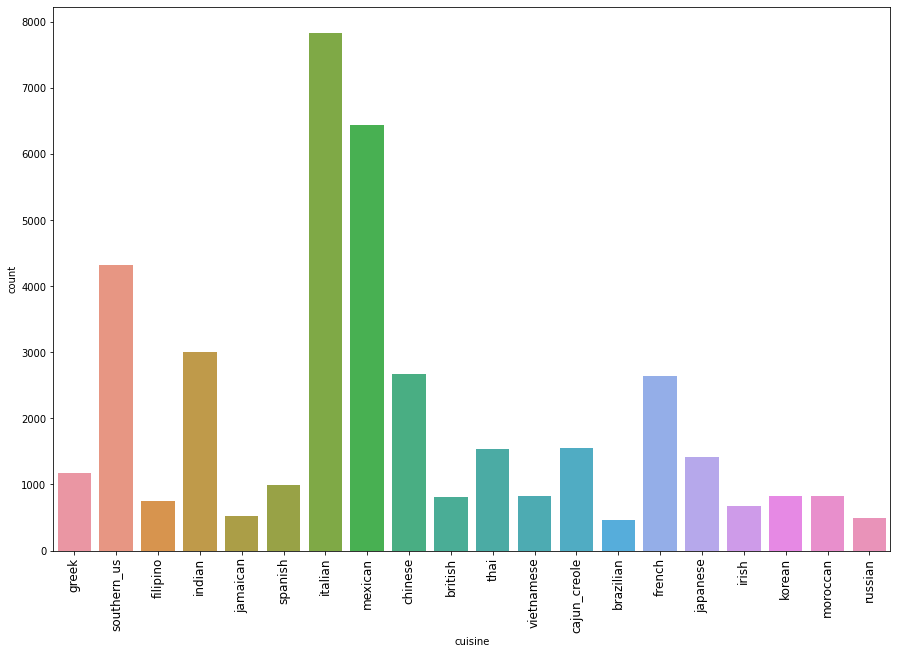

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
sns.countplot(df_train['cuisine'])
plt.xticks(rotation = 90,fontsize = 12)

In [ ]:
#add another column called "recipe" to apply tokenization tools
words = [' '.join(word) for word in df_train['ingredients']]
df_train['recipe'] = words
print(df_train['recipe'])
print(df_train['recipe'][1])

0        romaine lettuce black olives grape tomatoes ga...
1        plain flour ground pepper salt tomatoes ground...
2        eggs pepper salt mayonaise cooking oil green c...
3                           water vegetable oil wheat salt
4        black pepper shallots cornflour cayenne pepper...
                               ...                        
39769    light brown sugar granulated sugar butter warm...
39770    KRAFT Zesty Italian Dressing purple onion broc...
39771    eggs citrus fruit raisins sourdough starter fl...
39772    boneless chicken skinless thigh minced garlic ...
39773    green chile jalapeno chilies onions ground bla...
Name: recipe, Length: 39774, dtype: object
plain flour ground pepper salt tomatoes ground black pepper thyme eggs green tomatoes yellow corn meal milk vegetable oil


In [ ]:
df_train.head()

,id,cuisine,ingredients,recipe
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce black olives grape tomatoes ga...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour ground pepper salt tomatoes ground...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs pepper salt mayonaise cooking oil green c...
3,22213,indian,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper shallots cornflour cayenne pepper...


In [ ]:
df_train.shape

(39774, 4)

## Tokenization

In [ ]:


#Removing numbers ,puntuations and other special characters
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
#This removes the stopwords and tokenize the sentences
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,39774):
    review = re.sub('[^a-zA-Z]',' ',df_train['recipe'][i])
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(df_train['recipe'][i])
    review = [w for w in word_tokens if not w in stop_words]
    review=[]
    for w in word_tokens:
        if w not in stop_words:
          review.append(w)

    corpus.append(review)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_train['ingredients2'] = corpus

In [ ]:
df_train.head()

,id,cuisine,ingredients,recipe,ingredients2
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce black olives grape tomatoes ga...,"[romaine, lettuce, black, olives, grape, tomat..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour ground pepper salt tomatoes ground...,"[plain, flour, ground, pepper, salt, tomatoes,..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs pepper salt mayonaise cooking oil green c...,"[eggs, pepper, salt, mayonaise, cooking, oil, ..."
3,22213,indian,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt,"[water, vegetable, oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper shallots cornflour cayenne pepper...,"[black, pepper, shallots, cornflour, cayenne, ..."


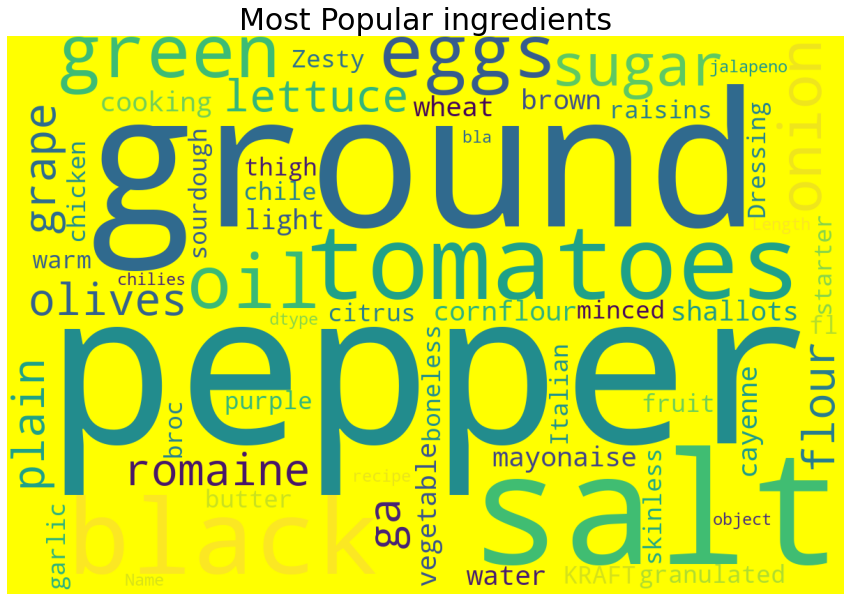

In [ ]:
# let's see the words cloud for the reviews 

# most popular drugs

import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'yellow', stopwords = stopwords, width = 1200, height = 800).generate(str(df_train['recipe']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular ingredients', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### Bag of word

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


ben=[]
for i in range(0,20000):
 ben.append(df_train['recipe'][i])

print(ben)
 
 
CountVec = CountVectorizer(ngram_range=(1,1), # to use bigrams ngram_range=(2,2)
                           stop_words='english')
#transform
Count_data = CountVec.fit_transform(ben)
 
#create dataframe
cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
print(cv_dataframe)

Output hidden; open in https://colab.research.google.com to view.

### TF-IDF

In [ ]:



#without smooth IDF
print("Without Smoothing:")
#define tf-idf
tf_idf_vec = TfidfVectorizer(use_idf=True, 
                        smooth_idf=False,  
                        ngram_range=(1,1),stop_words='english') # to use only  bigrams ngram_range=(2,2)


ben2=[]
for i in range(0,20):
 ben2.append(df_train['recipe'][i])

print(ben2)
#transform
tf_idf_data = tf_idf_vec.fit_transform(ben2)
 
#create dataframe
tf_idf_dataframe=pd.DataFrame(tf_idf_data.toarray(),columns=tf_idf_vec.get_feature_names())
print(tf_idf_dataframe)
print("\n")
 
#with smooth
tf_idf_vec_smooth = TfidfVectorizer(use_idf=True,  
                        smooth_idf=True,  
                        ngram_range=(1,1),stop_words='english')
 
 
tf_idf_data_smooth = tf_idf_vec_smooth.fit_transform(ben2)
 
print("With Smoothing:")
tf_idf_dataframe_smooth=pd.DataFrame(tf_idf_data_smooth.toarray(),columns=tf_idf_vec_smooth.get_feature_names())
print(tf_idf_dataframe_smooth)

Without Smoothing:
['romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles', 'plain flour ground pepper salt tomatoes ground black pepper thyme eggs green tomatoes yellow corn meal milk vegetable oil', 'eggs pepper salt mayonaise cooking oil green chilies grilled chicken breasts garlic powder yellow onion soy sauce butter chicken livers', 'water vegetable oil wheat salt', 'black pepper shallots cornflour cayenne pepper onions garlic paste milk butter salt lemon juice water chili powder passata oil ground cumin boneless chicken skinless thigh garam masala double cream natural yogurt bay leaf', 'plain flour sugar butter eggs fresh ginger root salt ground cinnamon milk vanilla extract ground ginger powdered sugar baking powder', 'olive oil salt medium shrimp pepper garlic chopped cilantro jalapeno chilies flat leaf parsley skirt steak white vinegar sea salt bay leaf chorizo sausage', 'sugar pistachio nuts white almond bark flo

In [ ]:
def stringify_ingredients(df):
    return [' '.join(ingredients) for ingredients in df['ingredients']]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline


In [ ]:
vocabulary = {}
for ingredient, i in zip(all_ingredients, range(len(all_ingredients))):
    vocabulary[ingredient] = i
cuisine_classifier = Pipeline([
    ('vect', CountVectorizer(vocabulary=vocabulary)),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])
str_train_ingredients = stringify_ingredients(df_train)
cuisine_classifier.fit(str_train_ingredients, df_train['cuisine'])
cuisine_classifier.score(str_train_ingredients, df_train['cuisine'])

0.7409362900387187

In [ ]:
predicted_train = cuisine_classifier.predict(str_train_ingredients)
from sklearn import metrics
print(metrics.classification_report(df_train['cuisine'], predicted_train, target_names=all_cuisines))

              precision    recall  f1-score   support

     spanish       0.60      0.42      0.50       467
      korean       0.48      0.38      0.42       804
     chinese       0.70      0.63      0.66      1546
  vietnamese       0.76      0.83      0.79      2673
    moroccan       0.75      0.40      0.53       755
     italian       0.63      0.46      0.53      2646
   brazilian       0.73      0.57      0.64      1175
    jamaican       0.82      0.91      0.86      3003
      french       0.58      0.29      0.39       667
      indian       0.73      0.89      0.80      7838
    filipino       0.72      0.63      0.67       526
     russian       0.79      0.69      0.74      1423
       greek       0.76      0.72      0.74       830
     british       0.87      0.91      0.89      6438
       irish       0.78      0.70      0.74       821
     mexican       0.65      0.39      0.48       489
cajun_creole       0.64      0.76      0.69      4320
        thai       0.71    

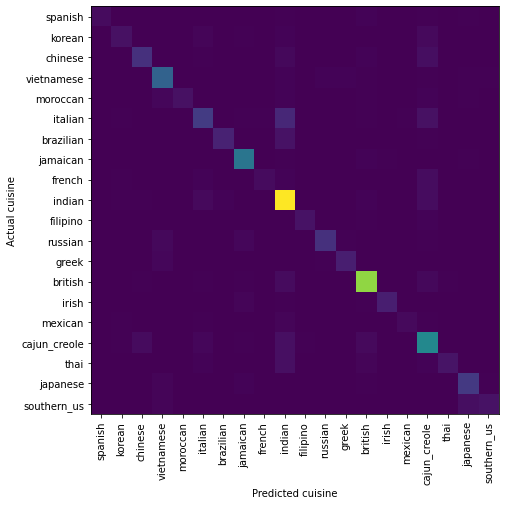

In [ ]:
confusion_matrix = metrics.confusion_matrix(df_train['cuisine'], predicted_train)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7.5,7.5))
im = ax.imshow(confusion_matrix)
ax.set_xticks(np.arange(len(all_cuisines)))
ax.set_yticks(np.arange(len(all_cuisines)))
ax.set_xticklabels(all_cuisines, rotation=90)
ax.set_yticklabels(all_cuisines)
ax.set_xlabel('Predicted cuisine')
ax.set_ylabel('Actual cuisine')
im;

Arbre de décision

In [ ]:
df_train['recipe']

0        romaine lettuce black olives grape tomatoes ga...
1        plain flour ground pepper salt tomatoes ground...
2        eggs pepper salt mayonaise cooking oil green c...
3                           water vegetable oil wheat salt
4        black pepper shallots cornflour cayenne pepper...
                               ...                        
39769    light brown sugar granulated sugar butter warm...
39770    KRAFT Zesty Italian Dressing purple onion broc...
39771    eggs citrus fruit raisins sourdough starter fl...
39772    boneless chicken skinless thigh minced garlic ...
39773    green chile jalapeno chilies onions ground bla...
Name: recipe, Length: 39774, dtype: object

In [ ]:
from sklearn import tree
X=pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=df_train.index)
y =  df_train['cuisine']
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(812.6517095312736, 813.5037209302326, 'X[3383] <= 0.5\ngini = 0.9\nsamples = 39774\nvalue = [467, 804, 1546, 2673, 755, 2646, 1175, 3003, 667\n7838, 526, 1423, 830, 6438, 821, 489, 4320, 989\n1539, 825]'),
 Text(790.022980418925, 809.7111627906977, 'X[2558] <= 0.5\ngini = 0.904\nsamples = 37563\nvalue = [466, 804, 1541, 2661, 753, 2645, 1170, 2995, 666\n7825, 521, 1422, 821, 4319, 821, 488, 4315, 982\n1525, 823]'),
 Text(748.1509710593053, 805.9186046511628, 'X[3149] <= 0.5\ngini = 0.916\nsamples = 34679\nvalue = [442, 793, 1484, 2657, 751, 2533, 1121, 2991, 659\n5414, 519, 1414, 821, 4280, 818, 486, 4180, 971\n1523, 822]'),
 Text(692.8575367983748, 802.1260465116279, 'X[2278] <= 0.5\ngini = 0.902\nsamples = 30121\nvalue = [440, 788, 1472, 636, 465, 2526, 1115, 2958, 652\n5395, 439, 660, 293, 4242, 814, 483, 4145, 967, 1037\n594]'),
 Text(652.818135029776, 798.333488372093, 'X[1292] <= 0.5\ngini = 0.901\nsamples = 29130\nvalue = [439, 786, 1472, 635, 465, 2526, 1115, 2032, 652\n5

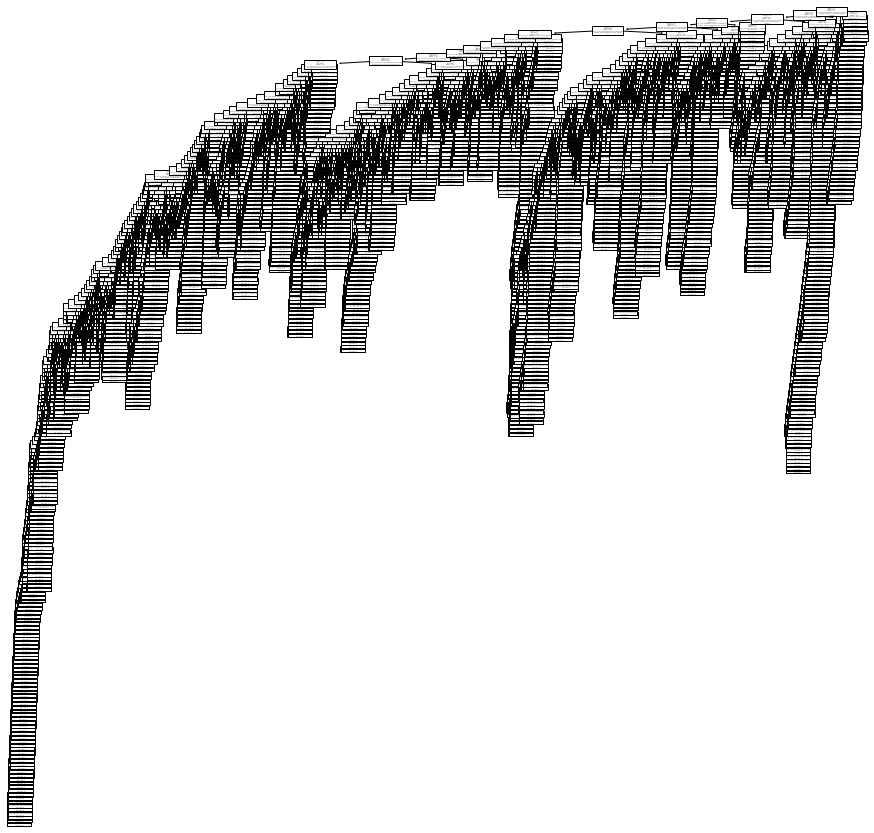

In [ ]:
tree.plot_tree(clf)

In [ ]:
pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
for i in range(len(df_train)):
  df_train['recipe'][i] =df_train['recipe'][i].split(" ")

s = df_train['recipe']

mlb = MultiLabelBinarizer()

X=pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=df_train.index)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
type(df_train["recipe"][0])

**Choosing parameters with Gridsearch**

In [ ]:


#On a utilisé gridsearch pour génerer les paramètres optimaux (la fonction perte à été calculée par plusieurs méthodes : log; squared_hinge)
from sklearn.model_selection import GridSearchCV
parameters = {
    'clf__loss': ('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron')
}
gs_clf = GridSearchCV(cuisine_classifier, parameters, cv=5, n_jobs=-1)
gs_clf = gs_clf.fit(str_train_ingredients, df_train['cuisine'])

In [ ]:
gs_clf.best_score_

0.7344999460284443

In [ ]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__loss: 'modified_huber'


In [ ]:
df_test = pd.read_json('/content/drive/MyDrive/Recipe/test.json')
df_test.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


**Predictions**


In [ ]:
predicted = cuisine_classifier.predict(stringify_ingredients(df_test))
df_test['cuisine'] = predicted
df_test.head()

,id,ingredients,cuisine
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",british
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",southern_us
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",italian
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",cajun_creole
4,35687,"[ground black pepper, salt, sausage casings, l...",italian
